BY Revan Minnam

In [95]:
import numpy as np
import pickle
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from collections import defaultdict
from mpl_toolkits.mplot3d import Axes3D

In [67]:
#1
def mymode(arr):
    count =  defaultdict(int)
    max_element = None
    max_count = 0
    for x in arr:
        count[x] = count[x] + 1   
        if count[x] > max_count:   
            (max_element , max_count) = (x, count[x])
        elif count[x] == max_count and x > max_element:
            max_element = x
    if max_count == 1:
        print("No mode exists")
        return None, None
    return max_element , max_count

In [69]:
#test
npArray = np.array([1,2,3,4,4,5,5,])
mymode(npArray)

(5, 2)

In [72]:
#2
outfile = '/public/bmort/python/numbers.pkl'
with open(outfile, 'rb') as f:
    data = pickle.load(f)
mymode(data)

(928, 3)

In [77]:
#Converting from inches to mm
def convert(x):
    if x == 'T':
        return x
    return float(x) * 25.4

In [80]:
#3
weather = pd.read_csv('/public/bmort/python/weather.csv')
#3A
weather["PREC_mm"] = weather["PREC"].map(convert)
weather.head(100)

,MONTH,DAY,HI,LO,AVG,DEP,HDD,CDD,PREC,PREC_mm
0,JUN,1,82,48,65,3,0,0,0,0
1,JUN,2,87,63,75,13,0,10,0,0
2,JUN,3,83,57,70,7,0,5,0.38,9.652
3,JUN,4,73,53,63,0,2,0,0,0
4,JUN,5,65,49,57,-6,8,0,0,0
...,...,...,...,...,...,...,...,...,...,...
87,AUG,27,78,62,70,2,0,5,T,T
88,AUG,28,72,55,64,-4,1,0,0,0
89,AUG,29,77,51,64,-4,1,0,0,0
90,AUG,30,88,62,75,7,0,10,0.47,11.938


In [26]:
#3B
#Both will yield the same result. The commented version is the right one to use
#weather.groupby("MONTH").max()
print("The maximum LO in July:", weather["LO"].max())

The maximum LO in July: 74


In [96]:
#4
cars = pd.read_csv('/public/bmort/python/mtcars.csv')
cars.describe()

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
count,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.0000
mean,20.090625,6.187500,230.721875,146.687500,3.596563,3.217250,17.848750,0.437500,0.406250,3.687500,2.8125
std,6.026948,1.785922,123.938694,68.562868,0.534679,0.978457,1.786943,0.504016,0.498991,0.737804,1.6152
min,10.400000,4.000000,71.100000,52.000000,2.760000,1.513000,14.500000,0.000000,0.000000,3.000000,1.0000
25%,15.425000,4.000000,120.825000,96.500000,3.080000,2.581250,16.892500,0.000000,0.000000,3.000000,2.0000
50%,19.200000,6.000000,196.300000,123.000000,3.695000,3.325000,17.710000,0.000000,0.000000,4.000000,2.0000
75%,22.800000,8.000000,326.000000,180.000000,3.920000,3.610000,18.900000,1.000000,1.000000,4.000000,4.0000
max,33.900000,8.000000,472.000000,335.000000,4.930000,5.424000,22.900000,1.000000,1.000000,5.000000,8.0000


In [93]:
#4A
X = cars[['hp', 'wt']].values
Y = cars["mpg"].values
model = LinearRegression().fit(X, Y)
model.predict(X)

array([23.5723294 , 22.58348256, 25.27581872, 21.26502011, 18.32726664,
       20.47381631, 15.59904236, 22.88706734, 21.99367331, 19.97945988,
       19.97945988, 15.72536854, 17.04383099, 16.84993945, 10.35520459,
        9.36273257,  9.19248699, 26.59902798, 29.31238022, 28.04620915,
       24.58644148, 18.81136386, 19.14097947, 14.55202805, 16.75674519,
       27.62665313, 26.03737415, 27.76976919, 16.54648866, 20.92541324,
       12.73947713, 22.98364943])

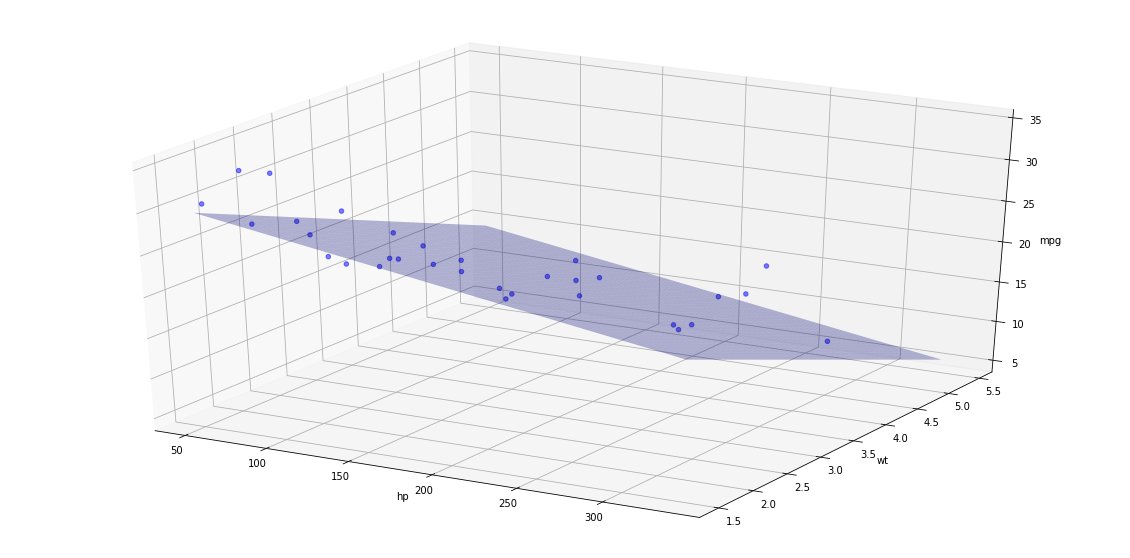

In [107]:
#4B
x_surf, y_surf = np.meshgrid(np.linspace(cars.hp.min(), cars.hp.max(), 100),np.linspace(cars.wt.min(), cars.wt.max(), 100))
fittedY = model.predict(pd.DataFrame({'hp': x_surf.ravel(), 'wt': y_surf.ravel()}))
fittedY = np.array(fittedY)
fig = plt.figure(figsize=(20,10))
### Set figure size
ax = fig.add_subplot(111, projection='3d')
ax.scatter(cars['hp'],cars['wt'],cars['mpg'],c='blue', marker='o', alpha=0.5)
ax.plot_surface(x_surf,y_surf,fittedY.reshape(x_surf.shape), color='b', alpha=0.3)
ax.set_xlabel('hp')
ax.set_ylabel('wt')
ax.set_zlabel('mpg')
plt.show()


In [109]:
#4C
print("The predicted Fuel Efficiency is", model.predict(np.array([[130, 1.5]])))

The predicted Fuel Efficiency is [27.2800409]
